In [ ]:
!unzip drive/MyDrive/data.zip

Archive:  drive/MyDrive/data.zip
   creating: data/
   creating: data/java/
  inflating: data/java/adjacency.zip  
  inflating: data/java/test.token.code  
  inflating: data/java/test.token.guid  
  inflating: data/java/test.token.nl  
  inflating: data/java/train.token.code  
  inflating: data/java/train.token.guid  
  inflating: data/java/train.token.nl  
  inflating: data/java/valid.token.code  
  inflating: data/java/valid.token.guid  
  inflating: data/java/valid.token.nl  
   creating: data/python/
  inflating: data/python/adjacency.zip  
  inflating: data/python/test.token.code  
  inflating: data/python/test.token.guid  
  inflating: data/python/test.token.nl  
  inflating: data/python/train.token.code  
  inflating: data/python/train.token.guid  
  inflating: data/python/train.token.nl  
  inflating: data/python/valid.token.code  
  inflating: data/python/valid.token.guid  
  inflating: data/python/valid.token.nl  


In [ ]:
with open('data/python/train.token.nl') as f:
    train_nl_tokens = f.readlines()

len(train_nl_tokens)

57203

In [ ]:
with open('data/python/valid.token.nl') as f:
    valid_nl_tokens = f.readlines()

len(valid_nl_tokens)

19067

In [ ]:
with open('data/python/test.token.nl') as f:
    test_nl_tokens = f.readlines()

len(test_nl_tokens)

19066

In [ ]:
overall_len = len(train_nl_tokens) + len(valid_nl_tokens) + len(test_nl_tokens)

print('train:', len(train_nl_tokens) / overall_len)
print('valid:', len(valid_nl_tokens) / overall_len)
print('test:', len(test_nl_tokens) / overall_len)

train: 0.6000146849039187
valid: 0.19999790215658303
test: 0.1999874129394982


In [ ]:
!git clone https://github.com/EdinburghNLP/code-docstring-corpus.git

Cloning into 'code-docstring-corpus'...
remote: Enumerating objects: 357, done.
remote: Total 357 (delta 0), reused 0 (delta 0), pack-reused 357
Receiving objects: 100% (357/357), 858.21 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Updating files: 100% (163/163), done.


In [ ]:
!gzip -d code-docstring-corpus/parallel-corpus/data_ps.declbodies.train.gz

In [ ]:
orig_samples = []

with open("code-docstring-corpus/parallel-corpus/data_ps.declbodies.train") as f:
    orig_samples += f.readlines()

with open("code-docstring-corpus/parallel-corpus/data_ps.declbodies.valid") as f:
    orig_samples += f.readlines()

with open("code-docstring-corpus/parallel-corpus/data_ps.declbodies.test") as f:
    orig_samples += f.readlines()

In [ ]:
import re

def prepare_declbody(declbody):
    declbody = re.sub(' +', ' ', declbody)
    declbody = re.sub(' DCNL ', '\n', declbody)
    declbody = re.sub('DCSP ', '\t', declbody)
    return declbody

In [ ]:
def show_code_with_lines(code):
    for i, line in enumerate(code.split('\n')):
        print(i,  line)

In [ ]:
import re

def prepare_tokens_for_search(tokens):
    merged = "".join(tokens)
    return re.sub(r'[^a-zA-Z0-9]+', '', merged)

def prepare_sample_for_search(sample):
    result = re.sub(' DCNL ', '', sample)
    result = re.sub('DCSP ', '', result)
    result = re.sub(' +', '', result)
    return re.sub(r'[^a-zA-Z0-9]+', '', result)

In [ ]:
def is_original_of_tokens(tokens, prep_sample):
    prep_tokens = prepare_tokens_for_search(tokens)
    return prep_tokens == prep_sample

# return index of the original sample
def find_tokens_original(tokens):
    for i, sample in enumerate(prep_samples):
        if is_original_of_tokens(tokens, sample):
            return i
    raise Exception('Tokens original not found')

# # return index of the original sample
# def find_tokens_original(tokens):
#     for i, sample in enumerate(prep_samples[::-1]):
#         if is_original_of_tokens(tokens, sample):
#             return len(prep_samples) - i - 1
#     raise Exception('Tokens original not found')

## Train line numbers

In [ ]:
import pickle

with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'rb') as f:
    tokens2orig = pickle.load(f)

In [ ]:
def get_line_numbers(tokens, guid):
    if guid in tokens2orig:
        tokens_orig_idx = tokens2orig[guid]
    else:
        tokens_orig_idx = find_tokens_original(tokens)
        tokens2orig[guid] = tokens_orig_idx
    tokens_original = orig_samples[tokens_orig_idx]
    prep_tokens_original = re.sub(r' +', '', tokens_original)
    prep_tokens_original = re.sub(r'[^a-zA-Z0-9]+', '', prep_tokens_original)
    prep_tokens_original = re.sub(r'DCSP', '', prep_tokens_original)

    tokens = [re.sub(r'[^a-zA-Z0-9]+', '', token) for token in tokens]

    token_idx = 0
    result = []

    for i, line in enumerate(prep_tokens_original.split("DCNL")):
        #print(line)
        current_line = line
        token = tokens[token_idx]
        substr_idx = current_line.find(token)
        while substr_idx != -1:
            result.append(i)
            current_line = current_line[substr_idx+len(token):]
            if not token_idx + 1 < len(tokens):
                break
            token_idx += 1
            token = tokens[token_idx]
            substr_idx = current_line.find(token)

    assert len(result) == len(tokens)

    return result

In [ ]:
def compress_lines(lines):
    return np.unique(lines, return_counts=True)[1]

In [ ]:
with open('data/python/train.token.code') as f:
    train_tokens = f.readlines()

train_tokens = list(map(lambda x: x.split(), train_tokens))

In [ ]:
with open('data/python/train.token.guid') as f:
    train_guids = f.readlines()

train_guids = list(map(int, train_guids))

In [ ]:
# prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
# !unzip PreprocDocstringLines.zip

In [ ]:
# import os
# done_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringLines/Train')]

In [ ]:
# from tqdm import tqdm
# import numpy as np

# for tokens, guid in tqdm(zip(train_tokens, train_guids), total=len(train_tokens)):
#     if guid in done_guids:
#         continue
#     line_numbers = np.array(get_line_numbers(tokens, guid))
#     with open(f"PreprocDocstringLines/Train/{guid}.npy", "wb") as f:
#         np.save(f, line_numbers)

100%|██████████| 57203/57203 [00:27<00:00, 2075.83it/s]


In [ ]:
# import os
# done_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringLines/Train')]

In [ ]:
# len(done_guids)

57203

In [ ]:
# !zip -r PreprocDocstringLines.zip PreprocDocstringLines/

In [ ]:
# !cp PreprocDocstringLines.zip drive/MyDrive/

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(train_tokens, train_guids), total=len(train_tokens)):
    line_numbers = np.array(get_line_numbers(tokens, guid))
    line_counts = compress_lines(line_numbers)
    with open(f"lines/{guid}.npy", "wb") as f:
        np.save(f, line_counts)

100%|██████████| 57203/57203 [00:33<00:00, 1730.57it/s]


In [ ]:
get_line_numbers(train_tokens[18725], 18725 )

# Compressed Lines

In [ ]:
!unzip lines.zip

In [ ]:
def compress_lines(lines):
    return np.unique(lines, return_counts=True)[1]

In [ ]:
import os
from tqdm import tqdm
import numpy as np

for name in tqdm(os.listdir('lines')):
    with open(f"lines/{name}", "rb") as f:
        orig_lines = np.load(f)
        compressed_lines = compress_lines(orig_lines)
    with open(f"CompressedLines/{name}", "wb") as out:
        np.save(out, compressed_lines)

100%|██████████| 76270/76270 [00:55<00:00, 1365.79it/s]


In [ ]:
!zip -r drive/MyDrive/CompressedLines.zip CompressedLines/

In [ ]:
!unzip lines.zip

In [ ]:
import numpy as np
from tqdm import tqdm
import os


line_lens = []
n_lines = []

# max_line_len = -1
# max_n_lines = -1

for name in tqdm(os.listdir('lines')):
    with open(f"lines/{name}", "rb") as f:
        compressed_lines = np.load(f)
        line_lens.append(compressed_lines.max())
        # max_line_len = max(max_line_len, compressed_lines.max())
        n_lines.append(len(compressed_lines))
        # max_n_lines = max(max_n_lines, len(compressed_lines))

100%|██████████| 95336/95336 [00:30<00:00, 3090.53it/s]


In [ ]:
max_line_len

361

In [ ]:
max_n_lines

107

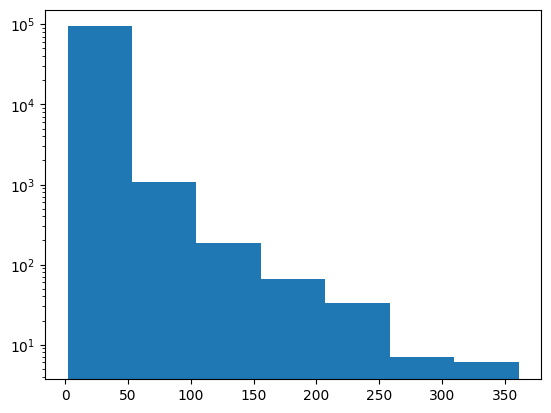

In [ ]:
import matplotlib.pyplot as plt

plt.hist(line_lens, bins=7, log=True)
plt.show()

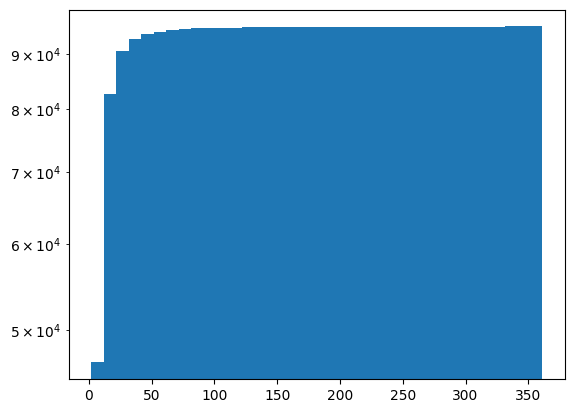

In [ ]:
import matplotlib.pyplot as plt

plt.hist(line_lens, bins=36, cumulative=True, log=True)
plt.show()

In [ ]:
len(list(filter(lambda x: x > 150, line_lens)))

126

In [ ]:
len(list(filter(lambda x: x > 100, line_lens)))

335

In [ ]:
len(list(filter(lambda x: x > 50, line_lens)))

1579

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44e2736ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44e27ef1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44e2736670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f44e27ef640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f44e27efd00>],
 'means': []}

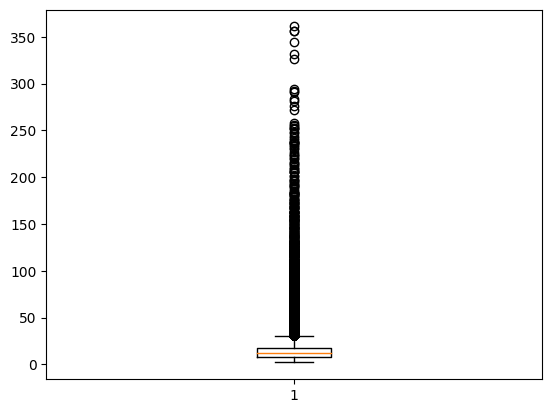

In [ ]:
plt.boxplot(line_lens)

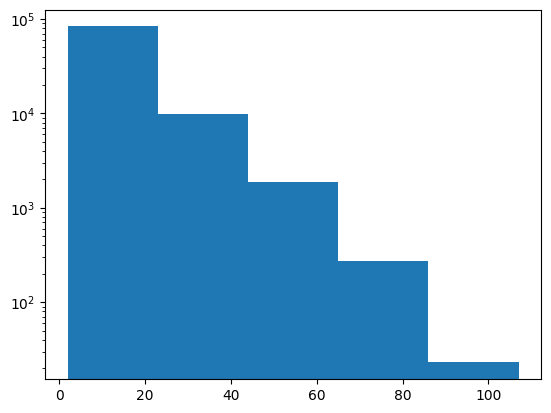

In [ ]:
import matplotlib.pyplot as plt

hist, bins, _ = plt.hist(n_lines, bins=5, log=True)

# fig, ax = plt.subplots()
# ax.pie(hist, labels=range(10))

plt.show()

In [ ]:
hist

array([6.5530e+04, 1.7778e+04, 7.1190e+03, 2.7340e+03, 1.3620e+03,
       5.1500e+02, 2.1700e+02, 5.8000e+01, 2.1000e+01, 2.0000e+00])

# Valid Lines

In [ ]:
with open('data/python/valid.token.code') as f:
    valid_tokens = f.readlines()

valid_tokens = list(map(lambda x: x.split(), valid_tokens))

In [ ]:
with open('data/python/valid.token.guid') as f:
    valid_guids = f.readlines()

valid_guids = list(map(int, valid_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(valid_tokens, valid_guids), total=len(valid_tokens)):
    line_numbers = np.array(get_line_numbers(tokens, guid))
    with open(f"PreprocDocstringLines/Valid/{guid}.npy", "wb") as f:
        np.save(f, line_numbers)

100%|██████████| 19067/19067 [3:38:56<00:00,  1.45it/s]


In [ ]:
!zip -r drive/MyDrive/PreprocDocstringLinesValid.zip PreprocDocstringLines/Valid/

In [ ]:
import pickle

with open('tokens2orig.pkl', 'wb') as f:
    pickle.dump(tokens2orig, f)

# Test Lines

In [ ]:
with open('data/python/test.token.code') as f:
    test_tokens = f.readlines()

test_tokens = list(map(lambda x: x.split(), test_tokens))

In [ ]:
with open('data/python/test.token.guid') as f:
    test_guids = f.readlines()

test_guids = list(map(int, test_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
import os

done_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringLinesTest')]

In [ ]:
len(done_guids)

19066

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(test_tokens, test_guids), total=len(test_tokens)):
    if guid in done_guids:
        continue
    line_numbers = np.array(get_line_numbers(tokens, guid))
    line_counts = compress_lines(line_numbers)
    with open(f"PreprocDocstringLinesTest/{guid}.npy", "wb") as f:
        np.save(f, line_counts)

100%|██████████| 19066/19066 [33:29<00:00,  9.49it/s]


In [ ]:
!zip -r PreprocDocstringLinesTest.zip PreprocDocstringLinesTest/

In [ ]:
len(tokens2orig)

83143

In [ ]:
import pickle

with open('tokens2orig.pkl', 'wb') as f:
    pickle.dump(tokens2orig, f)

# Control Flow

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz
!pip install python-graphs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd6

In [ ]:
from python_graphs import control_flow
import numpy as np

def get_cfg_adj(code):
    graph = control_flow.get_control_flow_graph(code)
    
    lines = code.split('\n')
    n_lines = len(lines) - 1

    cfg_adj = np.zeros((n_lines, n_lines))
    for node in graph.nodes:
        if hasattr(node, 'instruction') and hasattr(node.instruction.node, 'lineno'):
            current_node_line = node.instruction.node.lineno
        else:
            continue

        for next_node in list(node.next_from_end):
            if hasattr(next_node, 'instruction') and hasattr(next_node.instruction.node, 'lineno'):
                next_node_line = next_node.instruction.node.lineno 
                cfg_adj[current_node_line - 1][next_node_line - 1] = 1
    
    return cfg_adj

In [ ]:
code = prepare_declbody(orig_samples[6])
show_code_with_lines(code)

0 def get_group_index(labels, shape, sort, xnull):
1 	def _int64_cut_off(shape):
2 		acc = long(1)
3 		for (i, mul) in enumerate(shape):
4 			acc *= long(mul)
5 			if (not (acc < _INT64_MAX)):
6 				return i
7 		return len(shape)
8 	def loop(labels, shape):
9 		nlev = _int64_cut_off(shape)
10 		stride = np.prod(shape[1:nlev], dtype='i8')
11 		out = (stride * labels[0].astype('i8', subok=False, copy=False))
12 		for i in range(1, nlev):
13 			if (shape[i] == 0):
14 				stride = 0
15 			else:
16 				stride //= shape[i]
17 			out += (labels[i] * stride)
18 		if xnull:
19 			mask = (labels[0] == (-1))
20 			for lab in labels[1:nlev]:
21 				mask |= (lab == (-1))
22 			out[mask] = (-1)
23 		if (nlev == len(shape)):
24 			return out
25 		(comp_ids, obs_ids) = _compress_group_index(out, sort=sort)
26 		labels = ([comp_ids] + labels[nlev:])
27 		shape = ([len(obs_ids)] + shape[nlev:])
28 		return loop(labels, shape)
29 	def maybe_lift(lab, size):
30 		return (((lab + 1), (size + 1)) if (lab ==

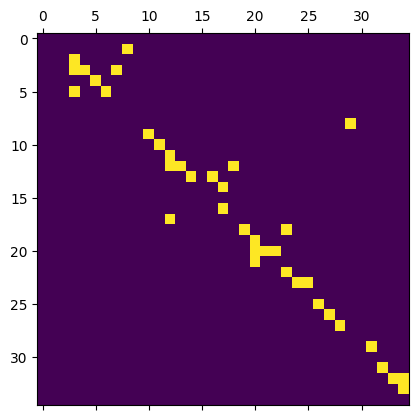

In [ ]:
import matplotlib.pyplot as plt

cfg_adj = get_cfg_adj(code)
plt.matshow(cfg_adj)

In [ ]:
# for i in range(cfg_adj.shape[0]):
#     print(i, ":", np.where(cfg_adj[i])[0])

In [ ]:
# np.where(cfg_adj[2])

In [ ]:
# from python_graphs import control_flow
# from python_graphs import control_flow_graphviz

# graph = control_flow.get_control_flow_graph(code)
# #control_flow_graphviz.render(graph, include_src=code, path='cfg.png')

# Train Control Flow

In [ ]:
with open('data/python/train.token.code') as f:
    train_tokens = f.readlines()

train_tokens = list(map(lambda x: x.split(), train_tokens))

In [ ]:
with open('data/python/train.token.guid') as f:
    train_guids = f.readlines()

train_guids = list(map(int, train_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
from tqdm import tqdm
import numpy as np

skipped_indices = []

for tokens, guid in tqdm(zip(train_tokens, train_guids), total=len(train_tokens)):
#for tokens, guid in zip(train_tokens, train_guids):
    tokens_original_idx = find_tokens_original(tokens)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        cfg_adj = get_cfg_adj(prep_tokens_original)
        with open(f"./drive/MyDrive/PreprocDocstringCFG/Train/{guid}.npy", "wb") as f:
            np.save(f, cfg_adj)
    except Exception as e:
        skipped_indices.append(tokens_original_idx)
        # print(tokens_original_idx, 'skipped')
        # print(e)
        # print()

 79%|███████▉  | 45248/57203 [6:50:21<2:53:28,  1.15it/s]

In [ ]:
import os

listdir = os.listdir("./drive/MyDrive/PreprocDocstringCFG/Train/")

In [ ]:
listdir = [int(s[:-4]) for s in listdir]

In [ ]:
listdir

In [ ]:
rem_indices = set(range(57203)) - set(listdir)

In [ ]:
rem_indices = sorted(list(rem_indices))

In [ ]:
len(rem_indices)

1391

In [ ]:
len(rem_indices) / 57203

0.024316906455955106

In [ ]:
tokens2orig = dict()

In [ ]:
from tqdm import tqdm
import numpy as np
import pickle


for idx in tqdm(rem_indices, total=len(rem_indices)):
    tokens = train_tokens[idx]
    guid = idx
    if idx in tokens2orig:
        tokens_original_idx = tokens2orig[idx]
    else:
        tokens_original_idx = find_tokens_original(tokens)
        tokens2orig[idx] = tokens_original_idx
        with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'wb') as f:
            pickle.dump(tokens2orig, f)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        cfg_adj = get_cfg_adj(prep_tokens_original)
        with open(f"./drive/MyDrive/PreprocDocstringCFG/Train/{guid}.npy", "wb") as f:
            np.save(f, cfg_adj)
        #print('saved')
    except:
        pass

100%|██████████| 13025/13025 [3:46:22<00:00,  1.04s/it]


In [ ]:
with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'wb') as f:
    pickle.dump(tokens2orig, f)

# Valid Control Flow

In [ ]:
with open('data/python/valid.token.code') as f:
    valid_tokens = f.readlines()

valid_tokens = list(map(lambda x: x.split(), valid_tokens))

In [ ]:
with open('data/python/valid.token.guid') as f:
    valid_guids = f.readlines()

valid_guids = list(map(int, valid_guids))

In [ ]:
import pickle

with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'rb') as f:
    tokens2orig = pickle.load(f)

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(valid_tokens, valid_guids), total=len(valid_tokens)):
    if guid in tokens2orig:
        tokens_original_idx = tokens2orig[guid]
    else:
        tokens_original_idx = find_tokens_original(tokens)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        cfg_adj = get_cfg_adj(prep_tokens_original)
        with open(f"PreprocDocstringCFGValid/{guid}.npy", "wb") as f:
            np.save(f, cfg_adj)
    except:
        pass

100%|██████████| 19067/19067 [00:26<00:00, 707.24it/s]


In [ ]:
!zip -r drive/MyDrive/PreprocDocstringCFGValid.zip PreprocDocstringCFGValid/

# Test CFG

In [ ]:
with open('data/python/test.token.code') as f:
    test_tokens = f.readlines()

test_tokens = list(map(lambda x: x.split(), test_tokens))

In [ ]:
with open('data/python/test.token.guid') as f:
    test_guids = f.readlines()

test_guids = list(map(int, test_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(test_tokens, test_guids), total=len(test_tokens)):
    if guid in tokens2orig:
        tokens_original_idx = tokens2orig[guid]
    else:
        tokens_original_idx = find_tokens_original(tokens)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        cfg_adj = get_cfg_adj(prep_tokens_original)
        with open(f"PreprocDocstringCFGTest/{guid}.npy", "wb") as f:
            np.save(f, cfg_adj)
    except:
        pass

100%|██████████| 19066/19066 [1:28:58<00:00,  3.57it/s] 


In [ ]:
len(tokens2orig)

83143

In [ ]:
!zip -r PreprocDocstringCFGTest.zip PreprocDocstringCFGTest/

# Data Flow

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz
!pip install python-graphs

In [ ]:
from python_graphs import instruction as instruction_module
from python_graphs import program_utils
from python_graphs import control_flow
from python_graphs import data_flow
import numpy as np

def get_lines_rws(n_lines, control_flow_graph):
    lines_rws = {i: {'reads': [], 'writes': []} for i in range(n_lines)}

    current_lineno = 0

    for i, control_flow_node in enumerate(control_flow_graph.nodes):
        last_accesses = control_flow_node.get_label('last_access_in').copy()
        
        try:
            current_lineno = control_flow_node.instruction.node.lineno - 1
        except:
            pass

        reads = [
            instruction_module.access_name(access)
            for access in control_flow_node.instruction.accesses
            if instruction_module.access_is_read(access)
        ]
        
        writes = [
            instruction_module.access_name(access)
            for access in control_flow_node.instruction.accesses
            if instruction_module.access_is_write(access)
        ]

        lines_rws[current_lineno] = {
            'reads': lines_rws[current_lineno]['reads'] + reads,
            'writes': lines_rws[current_lineno]['writes'] + writes,
        }
    
    return lines_rws

def get_dfg_adj(code):
    # get control flow
    program_node = program_utils.program_to_ast(code)
    control_flow_graph = control_flow.get_control_flow_graph(program_node)

    # perform data flow analysis
    analysis = data_flow.LastAccessAnalysis()
    for node in control_flow_graph.get_enter_control_flow_nodes():
        analysis.visit(node)
    
    lines = code.split('\n')
    n_lines = len(lines) - 1

    lines_reads_writes = get_lines_rws(n_lines, control_flow_graph)

    # fill adj matrix
    dfg_adj = np.zeros((n_lines, n_lines))
    for i in range(dfg_adj.shape[0]):
        for read in lines_reads_writes[i]['reads']:
            for j in range(i-1, -1, -1):
                if read in lines_reads_writes[j]['writes']:
                    dfg_adj[i][j] = 1
                    break
    return dfg_adj

In [ ]:
code = prepare_declbody(orig_samples[6])
show_code_with_lines(code)

0 def get_group_index(labels, shape, sort, xnull):
1 	def _int64_cut_off(shape):
2 		acc = long(1)
3 		for (i, mul) in enumerate(shape):
4 			acc *= long(mul)
5 			if (not (acc < _INT64_MAX)):
6 				return i
7 		return len(shape)
8 	def loop(labels, shape):
9 		nlev = _int64_cut_off(shape)
10 		stride = np.prod(shape[1:nlev], dtype='i8')
11 		out = (stride * labels[0].astype('i8', subok=False, copy=False))
12 		for i in range(1, nlev):
13 			if (shape[i] == 0):
14 				stride = 0
15 			else:
16 				stride //= shape[i]
17 			out += (labels[i] * stride)
18 		if xnull:
19 			mask = (labels[0] == (-1))
20 			for lab in labels[1:nlev]:
21 				mask |= (lab == (-1))
22 			out[mask] = (-1)
23 		if (nlev == len(shape)):
24 			return out
25 		(comp_ids, obs_ids) = _compress_group_index(out, sort=sort)
26 		labels = ([comp_ids] + labels[nlev:])
27 		shape = ([len(obs_ids)] + shape[nlev:])
28 		return loop(labels, shape)
29 	def maybe_lift(lab, size):
30 		return (((lab + 1), (size + 1)) if (lab ==

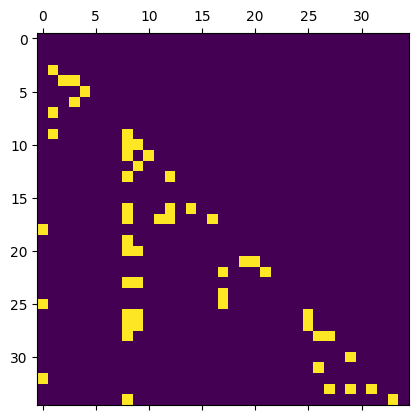

In [ ]:
import matplotlib.pyplot as plt

dfg_adj = get_dfg_adj(code)
plt.matshow(dfg_adj)

In [ ]:
# show_code_with_lines(code)

In [ ]:
# for i in range(dfg_adj.shape[0]):
#     print(i, ":", np.where(dfg_adj[i])[0])

# Train DFG

In [ ]:
with open('data/python/train.token.code') as f:
    train_tokens = f.readlines()

train_tokens = list(map(lambda x: x.split(), train_tokens))

In [ ]:
with open('data/python/train.token.guid') as f:
    train_guids = f.readlines()

train_guids = list(map(int, train_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
import pickle

with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'rb') as f:
    tokens2orig = pickle.load(f)

In [ ]:
import os
done_guids = os.listdir("./drive/MyDrive/PreprocDocstringDFG/Train/")

In [ ]:
done_guids = [int(name[:-4]) for name in done_guids]

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(train_tokens, train_guids), total=len(train_tokens)):
    if guid in done_guids:
        continue
    if guid in tokens2orig:
        tokens_original_idx = tokens2orig[guid]
    else:
        tokens_original_idx = find_tokens_original(tokens)
        tokens2orig[guid] = tokens_original_idx
        with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'wb') as f:
            pickle.dump(tokens2orig, f)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        dfg_adj = get_dfg_adj(prep_tokens_original)
        with open(f"./drive/MyDrive/PreprocDocstringDFG/Train/{guid}.npy", "wb") as f:
            np.save(f, dfg_adj)
    except:
        pass

100%|██████████| 57203/57203 [4:57:08<00:00,  3.21it/s]


# Valid DFG

In [ ]:
with open('data/python/valid.token.code') as f:
    valid_tokens = f.readlines()

valid_tokens = list(map(lambda x: x.split(), valid_tokens))

In [ ]:
with open('data/python/valid.token.guid') as f:
    valid_guids = f.readlines()

valid_guids = list(map(int, valid_guids))

In [ ]:
import pickle

with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'rb') as f:
    tokens2orig = pickle.load(f)

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(valid_tokens, valid_guids), total=len(valid_tokens)):
    if guid in tokens2orig:
        tokens_original_idx = tokens2orig[guid]
    else:
        tokens_original_idx = find_tokens_original(tokens)
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        dfg_adj = get_dfg_adj(prep_tokens_original)
        with open(f"PreprocDocstringDFGValid/{guid}.npy", "wb") as f:
            np.save(f, dfg_adj)
    except:
        pass

100%|██████████| 19067/19067 [00:45<00:00, 419.83it/s]


In [ ]:
!zip -r drive/MyDrive/PreprocDocstringDFGValid.zip PreprocDocstringDFGValid/

# Test DFG

In [ ]:
with open('data/python/test.token.code') as f:
    test_tokens = f.readlines()

test_tokens = list(map(lambda x: x.split(), test_tokens))

In [ ]:
with open('data/python/test.token.guid') as f:
    test_guids = f.readlines()

test_guids = list(map(int, test_guids))

In [ ]:
prep_samples = [prepare_sample_for_search(sample) for sample in orig_samples]

In [ ]:
from tqdm import tqdm
import numpy as np

for tokens, guid in tqdm(zip(test_tokens, test_guids), total=len(test_tokens)):
    if guid in tokens2orig:
        tokens_original_idx = tokens2orig[guid]
    else:
        tokens_original_idx = find_tokens_original(tokens)
        tokens2orig[guid] = tokens_original_idx
    tokens_original = orig_samples[tokens_original_idx]
    prep_tokens_original = prepare_declbody(tokens_original)
    try:
        dfg_adj = get_dfg_adj(prep_tokens_original)
        with open(f"PreprocDocstringDFGTest/{guid}.npy", "wb") as f:
            np.save(f, dfg_adj)
    except:
        pass

100%|██████████| 19066/19066 [1:28:22<00:00,  3.60it/s] 


In [ ]:
len(tokens2orig)

95336

In [ ]:
import pickle
with open('drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', "wb") as f:
    pickle.dump(tokens2orig, f)

In [ ]:
!zip -r PreprocDocstringDFGTest.zip PreprocDocstringDFGTest/

Streaming output truncated to the last 5000 lines.
  adding: PreprocDocstringDFGTest/91902.npy (deflated 52%)
  adding: PreprocDocstringDFGTest/76833.npy (deflated 76%)
  adding: PreprocDocstringDFGTest/80389.npy (deflated 78%)
  adding: PreprocDocstringDFGTest/89618.npy (deflated 89%)
  adding: PreprocDocstringDFGTest/90645.npy (deflated 94%)
  adding: PreprocDocstringDFGTest/82532.npy (deflated 98%)
  adding: PreprocDocstringDFGTest/91440.npy (deflated 90%)
  adding: PreprocDocstringDFGTest/91089.npy (deflated 80%)
  adding: PreprocDocstringDFGTest/81055.npy (deflated 62%)
  adding: PreprocDocstringDFGTest/90103.npy (deflated 98%)
  adding: PreprocDocstringDFGTest/94475.npy (deflated 84%)
  adding: PreprocDocstringDFGTest/90005.npy (deflated 52%)
  adding: PreprocDocstringDFGTest/82809.npy (deflated 91%)
  adding: PreprocDocstringDFGTest/90088.npy (deflated 96%)
  adding: PreprocDocstringDFGTest/84815.npy (deflated 52%)
  adding: PreprocDocstringDFGTest/87681.npy (deflated 84%)
  add

# ASG

In [ ]:
def get_asg_adj(code):
    cdf_adj = get_cfg_adj(code)
    dfg_adj = get_dfg_adj(code)
    asg_adj = np.clip(cfg_adj + dfg_adj, 0, 1)
    return asg_adj

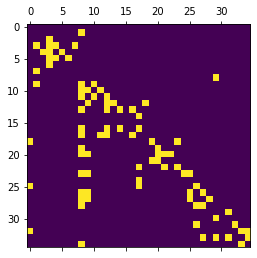

In [ ]:
asg_adj = get_asg_adj(code)
plt.matshow(asg_adj)

# Train ASG

In [ ]:
with open('data/python/train.token.guid') as f:
    train_guids = f.readlines()

train_guids = list(map(int, train_guids))

In [ ]:
!unzip PreprocDocstringCFG.zip

In [ ]:
import os

cfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringCFG/Train')]

In [ ]:
len(cfg_guids)

55812

In [ ]:
!unzip PreprocDocstringDFG.zip

In [ ]:
import os

dfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringDFG/Train')]

In [ ]:
len(dfg_guids)

55991

In [ ]:
import numpy as np
from tqdm import tqdm

for guid in tqdm(train_guids, total=len(train_guids)):
    if guid in cfg_guids and guid in dfg_guids:
        try:
            cfg_adj = np.load(f"PreprocDocstringCFG/Train/{guid}.npy")
            dfg_adj = np.load(f"PreprocDocstringDFG/Train/{guid}.npy")
            asg_adj = cfg_adj + dfg_adj
            with open(f"./drive/MyDrive/PreprocDocstringASG/Train/{guid}.npy", "wb") as f:
                np.save(f, asg_adj)
        except:
            pass

100%|██████████| 57203/57203 [08:59<00:00, 106.01it/s]


# Valid ASG

In [ ]:
with open('data/python/valid.token.guid') as f:
    valid_guids = f.readlines()

valid_guids = list(map(int, valid_guids))

In [ ]:
import os

cfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringCFGValid/')]

In [ ]:
len(cfg_guids)

18562

In [ ]:
import os

dfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringDFGValid')]

In [ ]:
len(dfg_guids)

18562

In [ ]:
import numpy as np
from tqdm import tqdm

for guid in tqdm(valid_guids, total=len(valid_guids)):
    if guid in cfg_guids and guid in dfg_guids:
        try:
            cfg_adj = np.load(f"PreprocDocstringCFGValid/{guid}.npy")
            dfg_adj = np.load(f"PreprocDocstringDFGValid/{guid}.npy")
            asg_adj = cfg_adj + dfg_adj
            with open(f"PreprocDocstringASGValid/{guid}.npy", "wb") as f:
                np.save(f, asg_adj)
        except:
            pass

100%|██████████| 19067/19067 [00:14<00:00, 1326.65it/s]


In [ ]:
!zip -r drive/MyDrive/PreprocDocstringASGValid.zip PreprocDocstringASGValid/

# Test ASG

In [ ]:
with open('data/python/test.token.guid') as f:
    test_guids = f.readlines()

test_guids = list(map(int, test_guids))

In [ ]:
import os

cfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringCFGTest/')]

In [ ]:
len(cfg_guids)

18603

In [ ]:
import os

dfg_guids = [int(name[:-4]) for name in os.listdir('PreprocDocstringDFGTest')]

In [ ]:
len(dfg_guids)

18603

In [ ]:
import numpy as np
from tqdm import tqdm

for guid in tqdm(test_guids, total=len(test_guids)):
    if guid in cfg_guids and guid in dfg_guids:
        try:
            cfg_adj = np.load(f"PreprocDocstringCFGTest/{guid}.npy")
            dfg_adj = np.load(f"PreprocDocstringDFGTest/{guid}.npy")
            asg_adj = cfg_adj + dfg_adj
            with open(f"PreprocDocstringASGTest/{guid}.npy", "wb") as f:
                np.save(f, asg_adj)
        except:
            pass

100%|██████████| 19066/19066 [00:21<00:00, 898.72it/s]


In [ ]:
!zip -r PreprocDocstringASGTest.zip PreprocDocstringASGTest/

Streaming output truncated to the last 5000 lines.
  adding: PreprocDocstringASGTest/91902.npy (deflated 52%)
  adding: PreprocDocstringASGTest/76833.npy (deflated 75%)
  adding: PreprocDocstringASGTest/80389.npy (deflated 76%)
  adding: PreprocDocstringASGTest/89618.npy (deflated 88%)
  adding: PreprocDocstringASGTest/90645.npy (deflated 94%)
  adding: PreprocDocstringASGTest/82532.npy (deflated 98%)
  adding: PreprocDocstringASGTest/91440.npy (deflated 89%)
  adding: PreprocDocstringASGTest/91089.npy (deflated 80%)
  adding: PreprocDocstringASGTest/81055.npy (deflated 59%)
  adding: PreprocDocstringASGTest/90103.npy (deflated 97%)
  adding: PreprocDocstringASGTest/94475.npy (deflated 83%)
  adding: PreprocDocstringASGTest/90005.npy (deflated 52%)
  adding: PreprocDocstringASGTest/82809.npy (deflated 89%)
  adding: PreprocDocstringASGTest/90088.npy (deflated 95%)
  adding: PreprocDocstringASGTest/84815.npy (deflated 52%)
  adding: PreprocDocstringASGTest/87681.npy (deflated 81%)
  add

# Zero ASG

In [ ]:
import pickle

with open('./drive/MyDrive/PreprocDocstringDict/tokens2orig.pkl', 'rb') as f:
    tokens2orig = pickle.load(f)

In [ ]:
with open("zero_matrices.txt", "r") as f:
    zero_matrices_guids = [int(name) for name in f.readlines()]

In [ ]:
for guid in zero_matrices_guids[:len(zero_matrices_guids)//3]:
    print(guid)
    print(prepare_declbody(orig_samples[tokens2orig[guid]]))

10044
def rand(individual):
	return (random.random(),)

10050
def exception():
	return sys.exc_info()[1]

10115
def call_doctest_bad():
	pass

10151
def test_accepts_non_list_hosts():
	assert (merge('badhosts', [], [], {}) == ['badhosts'])

10191
def get_configured_provider():
	return config.is_provider_configured(__opts__, (__active_provider_name__ or __virtualname__), ('user',))

10204
def _test_fetch(url):
	tempdir = _TempDir()
	with ArgvSetter(disable_stderr=False):
		archive_name = op.join(tempdir, 'download_test')
		_fetch_file(url, archive_name, timeout=30.0, verbose=False, resume=False)
		assert_raises(Exception, _fetch_file, 'NOT_AN_ADDRESS', op.join(tempdir, 'test'), verbose=False)
		resume_name = op.join(tempdir, 'download_resume')
		with open((resume_name + '.part'), 'w'):
			os.utime((resume_name + '.part'), None)
		_fetch_file(url, resume_name, resume=True, timeout=30.0, verbose=False)
		assert_raises(ValueError, _fetch_file, url, archive_name, hash_='a', verbose=False)
	

In [ ]:
for guid in zero_matrices_guids[len(zero_matrices_guids)//3:len(zero_matrices_guids)//3*2]:
    print(guid)
    print(prepare_declbody(orig_samples[tokens2orig[guid]]))

3201
def get_plugins():
	return _cache

32058
def framework():
	return s3_rest_controller(dtargs={'dt_text_maximum_len': 160}, hide_filter=True)

32060
def suite():
	return conf.build_suite([AccountFeedTest, DataFeedTest, ManagementFeedProfileTest, ManagementFeedGoalTest, ManagementFeedAdvSegTest])

32062
def getPluginFileNames():
	return archive.getPluginFileNamesFromDirectoryPath(getPluginsDirectoryPath())

32071
def provider_id():
	return _counter.count()

32087
def group():
	redirect(URL(c='admin', args=request.args, vars=request.vars))

3209
def fetch_token_mock(*args, **kwargs):
	return

32186
def regions():
	return get_regions('rds', region_cls=RDSRegionInfo, connection_cls=RDSConnection)

32199
def registered_tasks(request):
	return JsonResponse({u'regular': list(keys(tasks)), u'periodic': u''})

32231
def empty_formatter(view, value):
	return ''

32270
def path():
	return {'path': os.environ.get('PATH', '').strip()}

32298
def test_biweight_location_axis_3d():
	with NumpyRNGCo

In [ ]:
for guid in zero_matrices_guids[len(zero_matrices_guids)//3*2:]:
    print(guid)
    print(prepare_declbody(orig_samples[tokens2orig[guid]]))

5581
def repack(repo):
	with open_repo_closing(repo) as r:
		r.object_store.pack_loose_objects()

55906
def impact():
	return s3_rest_controller('impact', 'impact')

55943
def python_implementation():
	return _sys_version()[0]

55966
def getPluginsDirectoryPath():
	return archive.getAbsoluteFolderPath(os.path.dirname(__file__), os.path.join('skeinforge_plugins', 'meta_plugins'))

55973
def selection():
	return selection_model().selection()

56008
def pids():
	return _psplatform.pids()

56048
def release():
	return uname()[2]

56057
def get_load(jid):
	with _get_serv(ret=None, commit=True) as cur:
		sql = 'SELECT 	load 	FROM 	jids 	WHERE 	jid 	= 	%s;'
		cur.execute(sql, (jid,))
		data = cur.fetchone()
		if data:
			return json.loads(data[0])
		return {}

5610
def get_transparent_torification():
	return transparent_torification

56105
def action_initdb():
	make_wiki().init_database()

56107
def __virtual__():
	return ('kmod.available' in __salt__)

56118
def get_python_version():
	return

In [ ]:
with_zero_matrices = []

for guid in zero_matrices_guids:
    code = prepare_declbody(orig_samples[tokens2orig[guid]])
    if len(code.split('\n')) > 3:
        with_zero_matrices.append(guid)

In [ ]:
len(with_zero_matrices)

502

In [ ]:
with_zero_matrices

[10204,
 10961,
 110,
 11011,
 11447,
 11638,
 11678,
 11799,
 11802,
 12635,
 12685,
 12760,
 12761,
 12919,
 13168,
 13222,
 13273,
 13382,
 13402,
 13411,
 1352,
 13920,
 13950,
 13964,
 14203,
 1431,
 14407,
 1460,
 14655,
 14700,
 14721,
 15204,
 15253,
 15462,
 1564,
 15687,
 15930,
 15942,
 15962,
 16085,
 16091,
 1611,
 16255,
 16258,
 16328,
 16585,
 16918,
 16924,
 17020,
 17065,
 17219,
 1741,
 17444,
 17451,
 17636,
 18163,
 18396,
 18963,
 1924,
 19991,
 19999,
 2,
 20355,
 20594,
 20622,
 20824,
 20865,
 20883,
 21187,
 21491,
 21707,
 21758,
 23383,
 23502,
 23582,
 23917,
 24048,
 24314,
 24340,
 245,
 247,
 24755,
 24866,
 24877,
 24909,
 25196,
 25374,
 25397,
 25524,
 25544,
 25590,
 25809,
 25818,
 25943,
 25998,
 26133,
 26195,
 26332,
 264,
 26516,
 26529,
 26720,
 27163,
 2747,
 27999,
 28228,
 28404,
 28917,
 29058,
 29070,
 29140,
 29505,
 29549,
 29808,
 29829,
 29903,
 29934,
 29953,
 29997,
 30069,
 30199,
 30708,
 30776,
 30804,
 30852,
 31355,
 31454,
 322

In [ ]:
with open("with_zero_matrices.txt", "w") as f:
    for guid in with_zero_matrices:
        f.write(f"{guid}\n")

# ASG shape inconsistent with lines length

In [ ]:
!unzip CompressedLines.zip

In [ ]:
show_code_with_lines(prepare_declbody(orig_samples[tokens2orig[18725]]))

0 def ftpcp(source, sourcename, target, targetname='', type='I'):
1 	if (not targetname):
2 		targetname = sourcename
3 	type = ('TYPE 	' + type)
4 	source.voidcmd(type)
5 	target.voidcmd(type)
6 	(sourcehost, sourceport) = parse227(source.sendcmd('PASV'))
7 	target.sendport(sourcehost, sourceport)
8 	treply = target.sendcmd(('STOR 	' + targetname))
9 	if (treply[:3] not in ('125', '150')):
10 		raise error_proto
11 	sreply = source.sendcmd(('RETR 	' + sourcename))
12 	if (sreply[:3] not in ('125', '150')):
13 		raise error_proto
14 	source.voidresp()
15 	target.voidresp()
16 


In [ ]:
show_code_with_lines(prepare_declbody(orig_samples[tokens2orig[17256]]))

0 def _mergeOptions(inputOptions, overrideOptions):
1 	if inputOptions.pickledOptions:
2 		try:
3 			inputOptions = base64unpickle(inputOptions.pickledOptions)
4 		except Exception as ex:
5 			errMsg = ("provided 	invalid 	value 	'%s' 	for 	option 	'--pickled-options'" % inputOptions.pickledOptions)
6 			errMsg += ((" 	('%s')" % ex) if ex.message else '')
7 			raise SqlmapSyntaxException(errMsg)
8 	if inputOptions.configFile:
9 		configFileParser(inputOptions.configFile)
10 	if hasattr(inputOptions, 'items'):
11 		inputOptionsItems = inputOptions.items()
12 	else:
13 		inputOptionsItems = inputOptions.__dict__.items()
14 	for (key, value) in inputOptionsItems:
15 		if ((key not in conf) or (value not in (None, False)) or overrideOptions):
16 			conf[key] = value
17 	for (key, value) in conf.items():
18 		if (value is not None):
19 			kb.explicitSettings.add(key)
20 	for (key, value) in defaults.items():
21 		if (hasattr(conf, key) and (conf[key] is None)):
22 			conf[key] = value
23 	_

In [ ]:
show_code_with_lines(prepare_declbody(orig_samples[tokens2orig[39382]]))

0 def compile(marker):
1 	try:
2 		return _cache[marker]
3 	except KeyError:
4 		pass
5 	if (not marker.strip()):
6 		def marker_fn(environment=None, override=None):
7 			''
8 			return True
9 	else:
10 		compiled_marker = compile_marker(parse_marker(marker))
11 		def marker_fn(environment=None, override=None):
12 			'override 	updates 	environment'
13 			if (override is None):
14 				override = {}
15 			if (environment is None):
16 				environment = default_environment()
17 			environment.update(override)
18 			return eval(compiled_marker, environment)
19 	marker_fn.__doc__ = marker
20 	_cache[marker] = marker_fn
21 	return _cache[marker]
22 


In [ ]:
show_code_with_lines(prepare_declbody(orig_samples[tokens2orig[42670]]))

0 def bufferData(target, data, usage):
1 	if isinstance(data, int):
2 		size = data
3 		data = ctypes.c_voidp(0)
4 	else:
5 		if ((not data.flags['C_CONTIGUOUS']) or (not data.flags['ALIGNED'])):
6 			data = data.copy('C')
7 		data_ = data
8 		size = data_.nbytes
9 		data = data_.ctypes.data
10 	()
11 	if isinstance(data, int):
12 		size = data
13 		data = None
14 	else:
15 		size = data.nbytes
16 	GL.glBufferData(target, size, data, usage)
17 
